In [1]:
# general
import sys
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning)
from datetime import datetime
from time import time

# scikit learn datasets
from sklearn.datasets import load_files

# scikit feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# preprocessing, cross validation and model analysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

# scikit learn classifiers
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.lda import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

# used to pickle results
from sklearn.externals import joblib

# matplotlib

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline
import nltk
from nltk.stem import WordNetLemmatizer
import re

In [2]:
nltk.download('wordnet')
train = pd.read_json('train.json')
# data['ingredients_reciep'] = [' , '.join(z).strip() for z in data['ingredients']]  
train['ingredients_rec'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in train['ingredients']]       

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mniu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
train.drop['id']

TypeError: 'method' object is not subscriptable

**vector selecting**

In [48]:
# vectors = TfidfVectorizer.fit_transform(train['ingredients_rec'])
# vectors.shape()
import pandas as pd
vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words='english')
vectors = vect.fit_transform(train['ingredients_rec'])
# vectors = pd.DataFrame(vectors)
# vectors.fillna(0).to_sparse(fill_value=0)
train.to_csv('train.csv', index = False)

In [38]:
vectors.toarray() 
vectors.to_csv('vectors.csv', index = False)


AttributeError: to_csv not found

In [11]:
from sklearn.model_selection import train_test_split
text_train, text_test, target_train, target_test = train_test_split(
    train['ingredients_rec'], train['cuisine'], test_size=0.1, random_state=None)

In [16]:
text_clf_1 = Pipeline([('tfidf_vect', TfidfVectorizer(min_df=3, max_df=0.95)),('svm', LinearSVC(C=1000))])
parameters_1 = {'tfidf_vect__ngram_range': [(1, 1)]}
grid_search = GridSearchCV(text_clf_1, parameters_1, n_jobs=1).fit(text_train, target_train)

In [17]:
test_predicted = grid_search.predict(text_test)
print(metrics.classification_report(target_test, test_predicted))

              precision    recall  f1-score   support

   brazilian       0.44      0.58      0.50        45
     british       0.67      0.20      0.31        90
cajun_creole       0.76      0.43      0.55       155
     chinese       0.79      0.76      0.78       268
    filipino       0.63      0.53      0.58        81
      french       0.71      0.44      0.55       245
       greek       0.64      0.63      0.63       102
      indian       0.90      0.83      0.86       312
       irish       0.54      0.45      0.49        62
     italian       0.72      0.90      0.80       794
    jamaican       0.67      0.75      0.71        57
    japanese       0.72      0.69      0.70       147
      korean       0.77      0.81      0.79        74
     mexican       0.91      0.87      0.89       649
    moroccan       0.69      0.68      0.68        87
     russian       0.35      0.45      0.40        38
 southern_us       0.64      0.75      0.69       444
     spanish       0.46    

In [14]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

clf = tree.DecisionTreeClassifier()

text_clf_1 = Pipeline([('tfidf_vect', TfidfVectorizer(min_df=3, max_df=0.95)),('svm', clf)])
parameters_1 = {'tfidf_vect__ngram_range': [(1, 1)]}
grid_search = GridSearchCV(text_clf_1, parameters_1, n_jobs=1).fit(text_train, target_train)
test_predicted = grid_search.predict(text_test)
print(metrics.classification_report(target_test, test_predicted))
# print(test_predicted)
# print(target_test)

              precision    recall  f1-score   support

   brazilian       0.41      0.36      0.38        45
     british       0.26      0.24      0.25        90
cajun_creole       0.50      0.52      0.51       155
     chinese       0.67      0.71      0.69       268
    filipino       0.36      0.32      0.34        81
      french       0.39      0.42      0.40       245
       greek       0.58      0.60      0.59       102
      indian       0.75      0.79      0.77       312
       irish       0.32      0.34      0.33        62
     italian       0.75      0.72      0.74       794
    jamaican       0.49      0.39      0.43        57
    japanese       0.57      0.54      0.56       147
      korean       0.59      0.49      0.53        74
     mexican       0.83      0.84      0.83       649
    moroccan       0.49      0.45      0.47        87
     russian       0.14      0.16      0.15        38
 southern_us       0.54      0.55      0.54       444
     spanish       0.36    

In [46]:
print(len(text_train))
print(len(text_test))

35796
3978


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

text_clf_1 = Pipeline([('tfidf_vect', TfidfVectorizer(min_df=3, max_df=0.95)),('svm', clf)])
parameters_1 = {'tfidf_vect__ngram_range': [(1, 1)]}
grid_search = GridSearchCV(text_clf_1, parameters_1, n_jobs=1).fit(text_train, target_train)
test_predicted = grid_search.predict(text_test)
print(metrics.classification_report(target_test, test_predicted))

              precision    recall  f1-score   support

   brazilian       0.56      0.56      0.56        45
     british       0.48      0.46      0.47        90
cajun_creole       0.56      0.61      0.58       155
     chinese       0.73      0.85      0.79       268
    filipino       0.65      0.54      0.59        81
      french       0.50      0.61      0.55       245
       greek       0.65      0.72      0.68       102
      indian       0.82      0.87      0.84       312
       irish       0.57      0.45      0.50        62
     italian       0.76      0.83      0.79       794
    jamaican       0.80      0.49      0.61        57
    japanese       0.79      0.59      0.68       147
      korean       0.75      0.74      0.75        74
     mexican       0.84      0.87      0.85       649
    moroccan       0.77      0.63      0.70        87
     russian       0.65      0.34      0.45        38
 southern_us       0.74      0.67      0.70       444
     spanish       0.68    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
precision = pd.read_csv('Merics.csv',index_col=0)
precision.index

Index(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french',
       'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean',
       'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai',
       'vietnamese'],
      dtype='object')

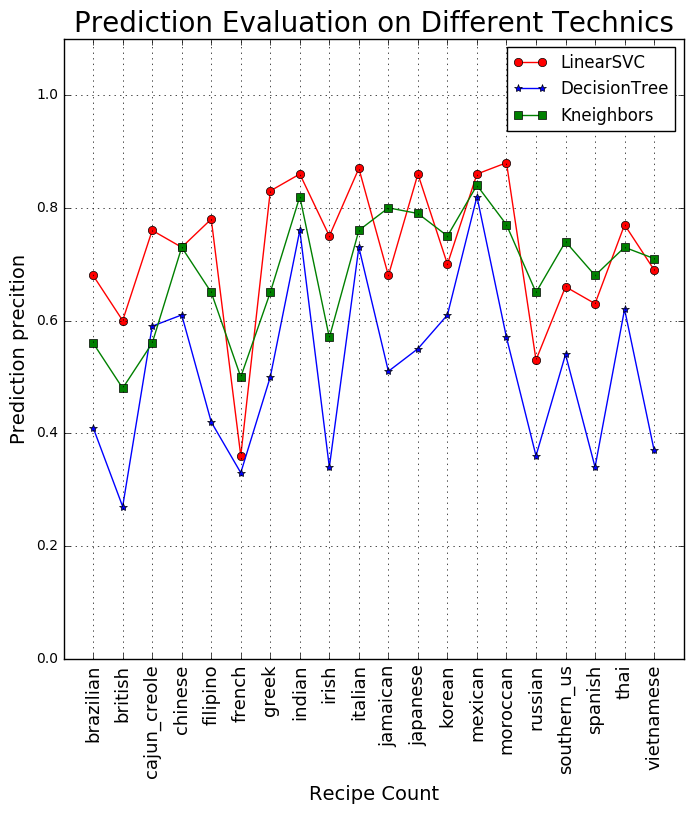

In [5]:
plt.figure(figsize=(8,8))
plt.plot(range(len(precision)), precision['LinearSVC'], 'ro-', range(len(precision)), precision['DecisionTree'],'b*-', 
         range(len(precision)), precision['Kneighbors'], 'gs-')
plt.xticks(range(len(precision)), list(precision.index), rotation=90,fontsize=13)
plt.xlabel('Recipe Count',fontsize=14)
plt.ylabel('Prediction precition',fontsize=14)
plt.title('Prediction Evaluation on Different Technics',fontsize=20)
plt.legend(['LinearSVC','DecisionTree','Kneighbors'])
plt.xlim(-1, 20)
plt.ylim(0, 1.1)
plt.grid()
plt.savefig('Merics.jpg')
plt.show()

In [15]:
test = pd.read_json('test.json')
# data['ingredients_reciep'] = [' , '.join(z).strip() for z in data['ingredients']]  
test['ingredients_rec'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in test['ingredients']]       

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression


train_text = train['ingredients_rec']
vectorizer_train = TfidfVectorizer(stop_words='english')
#                                    ,ngram_range = (1,1),analyzer="word",max_df=0.9,binary=False,token_pattern=r'\w+',sublinear_tf=False)
tfidf_train = vectorizer_train.fit_transform(train_text).todense()
test_text = test['ingredients_rec']
vectorizer_test = TfidfVectorizer(stop_words='english')
tfidf_test=vectorizer_train.transform(test_text)

predictors_train = tfidf_train

targets_train = train['cuisine']

predictors_test = tfidf_test

C:\Users\mniu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mniu\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


<9944x2954 sparse matrix of type '<class 'numpy.float64'>'
	with 188183 stored elements in Compressed Sparse Row format>

In [3]:
pd.options.display.max_colwidth = 5000
data = data.drop(['id','ingredients'],axis=1)


In [ ]:
# 
# data_clean = data[['cuisine','ingredients_reciep']]
# pd.DataFrame(data_clean['ingredients_reciep'])
# data_clean.to_csv('food.csv', index = False)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(data['ingredients_reciep'])
print(X)

  (0, 2326)	0.342667129117
  (0, 1545)	0.266387123701
  (0, 254)	0.139896200492
  (0, 1892)	0.261009241087
  (0, 1184)	0.350311702385
  (0, 2808)	0.151835178374
  (0, 1107)	0.105310731546
  (0, 2024)	0.102084113576
  (0, 2210)	0.239132201981
  (0, 1896)	0.164549308995
  (0, 2435)	0.23007896012
  (0, 1101)	0.38853112216
  (0, 188)	0.207488021689
  (0, 971)	0.304036176504
  (0, 531)	0.145683698668
  (0, 748)	0.33432047461
  (1, 254)	0.167252325252
  (1, 2808)	0.363051841991
  (1, 2024)	0.244092481523
  (1, 2108)	0.340458938812
  (1, 1026)	0.181756249978
  (1, 1219)	0.298265930913
  (1, 2381)	0.107369771169
  (1, 2785)	0.269686721645
  (1, 910)	0.199241150603
  :	:
  (39772, 2652)	0.264116002478
  (39772, 306)	0.264116002478
  (39772, 2632)	0.245065282683
  (39772, 2950)	0.246272238575
  (39773, 254)	0.153836598191
  (39773, 2808)	0.166965273142
  (39773, 1107)	0.115804751216
  (39773, 2024)	0.224513213463
  (39773, 1219)	0.137170637534
  (39773, 2381)	0.0987573734491
  (39773, 1205)	0.34

In [5]:
test = pd.read_json('test.json')
test['ingredients_reciep'] = [' , '.join(z).strip() for z in test['ingredients']]  
test_clean = test.drop(['id','ingredients'],axis=1)
len(test_clean)

9944

In [ ]:
X.to_csv('Vectorized.csv', index = False)
savetxt('C:/localpath/test.csv',prediction, ,delimiter=',')

In [ ]:
tar_food = data.cuisine
recip_food = data.ingredients
file = open('food.txt','w')
file.write(str(recip_food))
file.close()
recip_food.head()